# Hyperparameter tuning

##### XGBoost model 
##### annotation result 0, 1 (binary classification)
##### 결측치 mean()
##### age, gender 제외한 항목들 중 중요 항목으로 선택된 36개 검사항목 insert

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('judge 제거_LCE.csv')

## Preprocessing
#### 1. annotation result = 3, Null drop

In [20]:
# annotation result = 0, 1, 2 만 남기고 확인 

null_annot = list(np.where(df['annotation_result'].isna() == True)[0])
df = df.drop(null_annot, axis = 'index')
df.index = range(len(df))

three_annot = list(np.where(df['annotation_result'] == 3)[0])
df = df.drop(three_annot, axis = 'index')
df.index = range(len(df))

df['annotation_result'].unique()

array([1., 0., 2.])

## X, y 정의 후 train, validation, test split

In [21]:
df = df.fillna(df.mean())
df

#최빈값
#df = df.fillna(df.mode().iloc[0])
#df

#중앙값
#df = df.fillna(df.median().iloc[0])
#df

,sample_date,hospital_number_id,hospital_number,annotation,annotation_result,age,gender,N817,T103,H103,...,L464,H129,C203,H102,C180,C159,L620,L621,L622,L623
0,2019.4.16,481,4,1,1.0,53.653046,NaN,358.419705,2359.84,6860.0,...,25.000000,325.450617,10.277011,4.66,102.298817,85.343612,1024.17,599.40,167.944515,131.844893
1,2019.4.16,395,23,1,1.0,53.653046,NaN,358.419705,1062.89,6770.0,...,19.600000,325.450617,10.277011,4.92,102.298817,85.343612,426.22,196.63,167.944515,131.844893
2,2019.11.7,395,23,1,1.0,53.653046,NaN,430.700000,1773.36,8210.0,...,10.100000,325.450617,4.900000,4.86,102.298817,78.000000,897.32,322.75,167.944515,131.844893
3,2017.11.1,397,24,1,0.0,53.653046,NaN,358.419705,2389.20,7240.0,...,13.022909,325.450617,10.277011,4.90,102.298817,85.343612,1134.87,346.43,167.944515,131.844893
4,2018.1.31,66,29,1,0.0,54.000000,F,358.419705,1716.81,6430.0,...,13.022909,325.450617,10.277011,3.99,102.298817,85.343612,743.38,326.19,167.944515,131.844893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,2022.8.17,385,1843,1,0.0,58.000000,F,40.000000,2910.57,6630.0,...,6.300000,356.000000,10.200000,4.30,93.000000,141.000000,2018.00,453.00,179.000000,86.000000
1780,2022.7.5,387,1846,1,1.0,57.000000,F,40.000000,1928.50,4750.0,...,15.100000,260.000000,10.700000,3.79,90.000000,106.000000,911.00,591.00,112.000000,197.000000
1781,2022.7.8,388,1847,1,0.0,49.000000,F,40.000000,1792.92,6690.0,...,11.000000,269.000000,16.800000,4.13,95.000000,22.000000,825.00,515.00,205.000000,138.000000
1782,2022.8.3,389,1852,1,2.0,51.000000,F,40.000000,1892.02,4940.0,...,20.100000,455.000000,9.800000,4.24,86.000000,42.000000,828.00,527.00,237.000000,198.000000


In [22]:
zero = list(np.where(df['annotation_result'] == 0)[0])
one = list(np.where(df['annotation_result'] == 1)[0])
two = list(np.where(df['annotation_result'] == 2)[0])
df['annotation_result'][zero] = 0
df['annotation_result'][one] = 0
df['annotation_result'][two] = 1

df['annotation_result'].unique()

array([0., 1.])

In [23]:
# Select all columns except certain columns
X = df.loc[:,['H103','X106','X105','X103','X104','X102','T102','L620','L621','T103','L622','L623',
              'P006','N817','C408','E512','S469','H105','H121','C102','C110','C104','C119',
             'C120','C121','C122','C401','E406','E403','Z977','C153','K087','K086','E427','C404',
             'L464']]
y = np.ravel(df.loc[:, ['annotation_result']])

from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Training set:  (1427, 36) (1427,)
Test set:  (357, 36) (357,)


In [24]:
# 1. Standard Scaler
from sklearn.preprocessing import StandardScaler, RobustScaler, scale

# Initialize the StandardScaler
#standard_scaler = StandardScaler()
# Fit the scaler on the training data
#standard_scaler.fit(X_train)
# Scale the training, validation, and test data using the scaler
#X_train_standard = standard_scaler.transform(X_train)
#X_val_standard = standard_scaler.transform(X_val)
#X_test_standard = standard_scaler.transform(X_test)


# 2. Initialize the RobustScaler
robust_scaler = RobustScaler()
# Scale the training, validation, and test data using the scaler
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'max_depth': range(3, 10),
    'n_estimators': range(50, 200, 10),
    'min_child_weight': range(1, 6),
    'subsample': np.arange(0.5, 1, 0.05),
    'colsample_bytree': np.arange(0.5, 1, 0.05)
}

# Create an XGBoost classifier object
clf = XGBClassifier()

# Define the random search object
random_search = RandomizedSearchCV(
    clf, param_distributions=param_grid, n_iter=100,
    cv=5, scoring='f1', n_jobs=-1, verbose=1
)

# Fit the random search object to the data
random_search.fit(X, y)

# Print the best parameters and score
print('Best parameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'subsample': 0.9500000000000004, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.08, 'colsample_bytree': 0.9500000000000004}
Best score: 0.5606653471389794


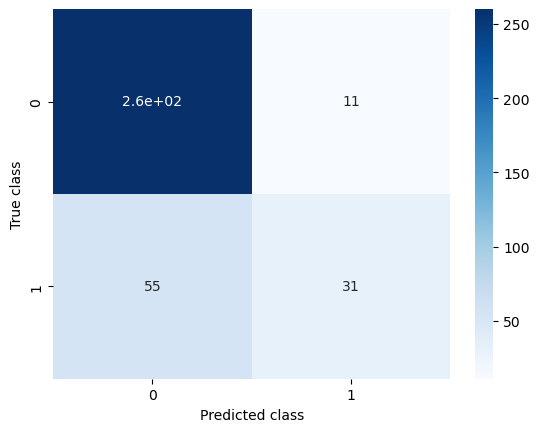

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       271
         1.0       0.74      0.36      0.48        86

    accuracy                           0.82       357
   macro avg       0.78      0.66      0.69       357
weighted avg       0.80      0.82      0.79       357



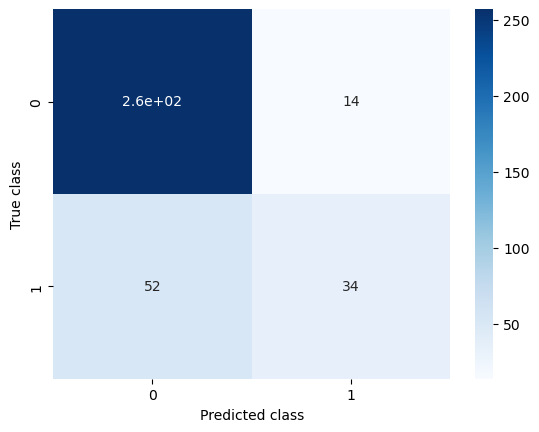

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       271
         1.0       0.71      0.40      0.51        86

    accuracy                           0.82       357
   macro avg       0.77      0.67      0.70       357
weighted avg       0.80      0.82      0.79       357



In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define the function to train the models and output confusion matrix and classification report
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    # Train the model
    trained_model = model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = trained_model.predict(X_test)

    # Compute the accuracy, confusion matrix and classification report
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.xlabel("Predicted class")
    plt.ylabel("True class")
    plt.show()

    # Print the classification report
    print("Classification Report:")
    print(class_report)

    return trained_model, accuracy, cm, class_report


# Train and evaluate the xgboost model
xgb_model, xgb_accuracy, xgb_conf_matrix, xgb_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, XGBClassifier
                                                                                (subsample= 0.9500000000000004, n_estimators =100, min_child_weight =3, 
                                                                                 max_depth= 8, learning_rate= 0.08, colsample_bytree= 0.9500000000000004
                                                                                ))

xgb_model, xgb_accuracy, xgb_conf_matrix, xgb_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, XGBClassifier
                                                                                ())

# Train and evaluate the gradient boosting model
#gb_model, gb_accuracy, gb_conf_matrix, gb_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, GradientBoostingClassifier
                                                                            #(subsample = 0.6, n_estimators=80, min_samples_split=9, min_samples_leaf= 1, 
                                                                             #max_features = None, max_depth= 3, learning_rate= 0.03, random_state=42))

# Train and evaluate the SVM
#svm_model, svm_accuracy, svm_conf_matrix, svm_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, 
                                                                                #SVC(kernel='rbf'))

# Train and evaluate the random forest model
#rf_model, rf_accuracy, rf_conf_matrix, rf_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42))

## weights 

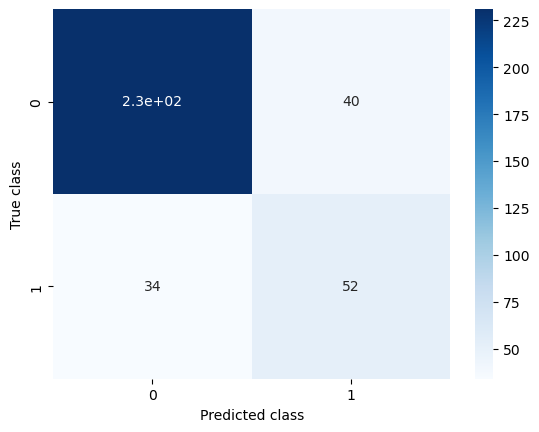

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       271
         1.0       0.57      0.60      0.58        86

    accuracy                           0.79       357
   macro avg       0.72      0.73      0.72       357
weighted avg       0.80      0.79      0.80       357



In [26]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)

# scale_pos_weight 값을 2로 설정하여 모델 학습
param = {'max_depth': 3, 'eta': 0.1, 'scale_pos_weight': 2.7}
num_round = 10
bst = xgb.train(param, dtrain, num_round)

# 테스트 데이터 예측
dtest = xgb.DMatrix(data=X_test)
y_pred = bst.predict(dtest)
y_pred = [1 if val > 0.5 else 0 for val in y_pred]

# classification report 출력


cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()
print(classification_report(y_test, y_pred))

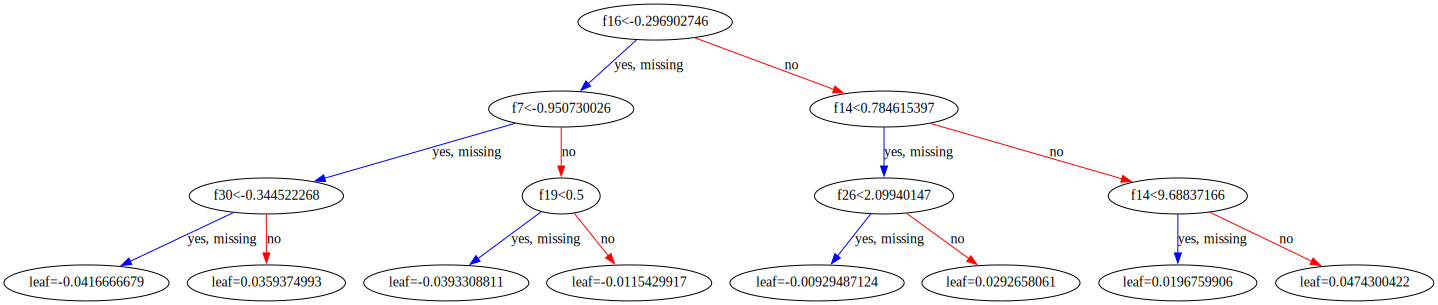

In [65]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

from xgboost import to_graphviz
import graphviz
 
graph = to_graphviz(bst, num_trees = 0, feature_names = X.columns)
graph

In [75]:
## 이미지 저장
graph.render(filename='xgb', directory='./', format='png')

'xgb.png'

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

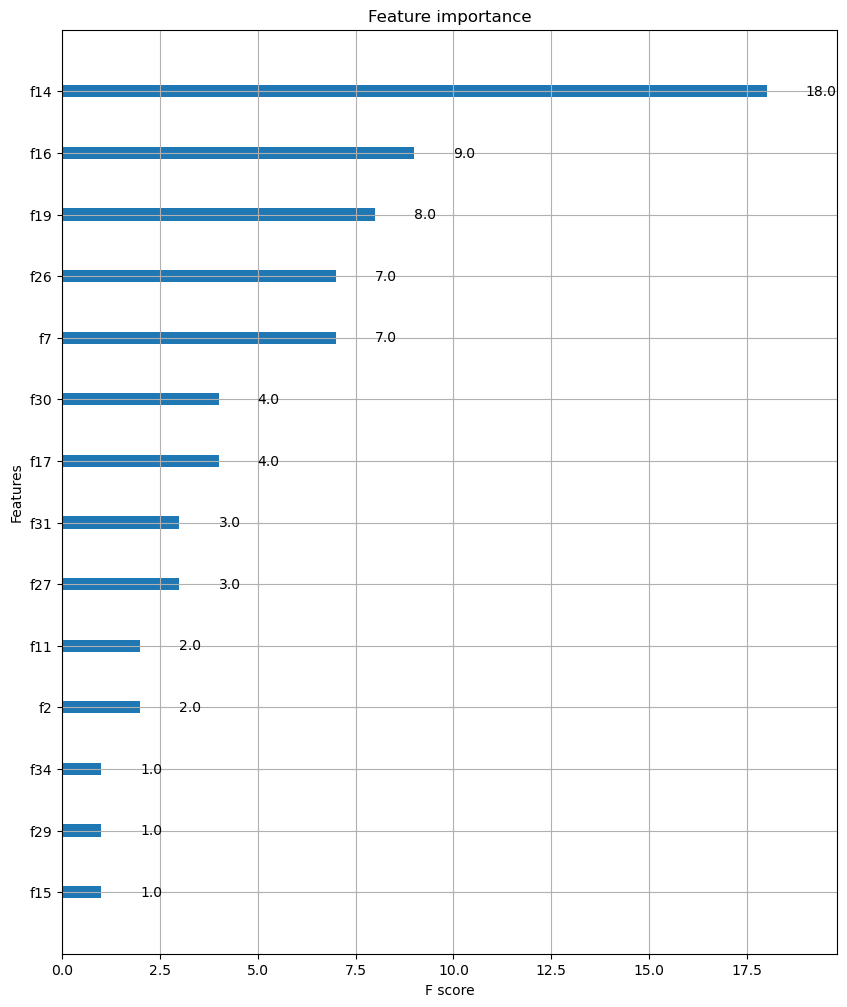

In [69]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(bst, ax = ax)

In [76]:
X.columns

Index(['H103', 'X106', 'X105', 'X103', 'X104', 'X102', 'T102', 'L620', 'L621',
       'T103', 'L622', 'L623', 'P006', 'N817', 'C408', 'E512', 'S469', 'H105',
       'H121', 'C102', 'C110', 'C104', 'C119', 'C120', 'C121', 'C122', 'C401',
       'E406', 'E403', 'Z977', 'C153', 'K087', 'K086', 'E427', 'C404', 'L464'],
      dtype='object')

## LBGM

In [71]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 21.6 MB/s eta 0:00:00


Accuracy: 0.8123249299719888


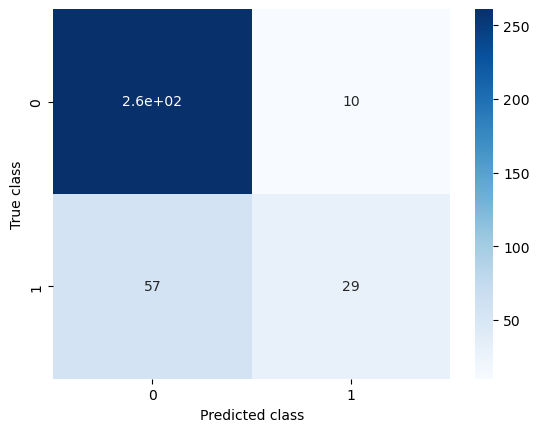

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89       271
         1.0       0.74      0.34      0.46        86

    accuracy                           0.81       357
   macro avg       0.78      0.65      0.68       357
weighted avg       0.80      0.81      0.78       357



In [74]:
from lightgbm import LGBMClassifier

# 모델 생성
LGBM = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)

# 모델 학습
LGBM.fit(X_train, y_train)

# 모델 예측
y_pred = LGBM.predict(X_test)

# 모델 성능 평가
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))



cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()
print(classification_report(y_test, y_pred))